# **Text Clustering dengan Algoritma FCM (Final Project Text Mining)**
---
## **Kelompok 4**
- Ramadhan Adiputra Asta Kusumah (215150200111002)
- Rizky Dwi Purnomo (215150201111005)
- Fathia Amaliah (215150201111018)
- Amira Ghina Nurfansepta (215150201111026)

## **Import Dataset**
Data yang digunakan berupa data paper scopus dari Universitas Brawijaya.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_json('/content/drive/MyDrive/SEMESTER 5/TM/judul_all_ub_scopus.json')
# df = pd.read_json('judul_all_ub_scopus.json')
data.head()

,title,url,publisher,cited,year,quartile
0,Genetic Diversity of Gorontalo Local Cattle Ba...,https://www.scopus.com/record/display.uri?eid=...,Advances in Animal and Veterinary Sciences,0,2023,Q3 Journal
1,Consumers’ Preference and Future Consideration...,https://www.scopus.com/record/display.uri?eid=...,Agris On-line Papers in Economics and Informatics,0,2023,Q2 Journal
2,A meta-analysis of the effects of clay mineral...,https://www.scopus.com/record/display.uri?eid=...,Poultry Science,7,2023,Q1 Journal
3,Identification and Analysis of Geotourism Pote...,https://www.scopus.com/record/display.uri?eid=...,AIP Conference Proceedings,1,2023,Q4 Journal
4,Epipsammic Diatom Cocconesis sp. as New Bioero...,https://www.scopus.com/record/display.uri?eid=...,Jurnal Ilmiah Perikanan dan Kelautan,0,2023,Q4 Journal


In [ ]:
data.shape

(11456, 6)

## **Preprocessing**

### **Feature Selection**
Memilih fitur yang akan diproses, yaitu title dan publisher kemudian di-concat.

In [ ]:
data['title-publisher'] = data['title'] + ' ' + data['publisher']

In [ ]:
doc = data[['title-publisher']].sample(n=3000, random_state=0)
# doc = data[['title-publisher']]
doc

,title-publisher
2613,Identifying slum area spread based on multi-te...
2315,Mechanical properties of untreated and alkalin...
10145,In silico analysis reveals the potential of my...
3245,An implementation of delay-disruption tolerant...
4732,Geospatial model of physical and social vulner...
...,...
4214,Operation ballast water of commercial vessels ...
9431,Structure and composition of major arbuscular ...
8375,Evaluation of ecosystem services based on amph...
2702,Influence of impregnation ratio on physicochem...


### **Menghilangkan Data Duplikat**
Data duplikat dihapus supaya mendapatkan hasil yang lebih baik.


In [ ]:
print("Data duplikat (awal):", doc.duplicated().sum())
doc = doc.drop_duplicates(keep='first').reset_index(drop=True)
print("Data duplikat (akhir):", doc.duplicated().sum())

doc = doc.transpose()
doc

Data duplikat (awal): 341
Data duplikat (akhir): 0


,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,Identifying slum area spread based on multi-te...,Mechanical properties of untreated and alkalin...,In silico analysis reveals the potential of my...,An implementation of delay-disruption tolerant...,Geospatial model of physical and social vulner...,The use of mercury-resistant bacteria to enhan...,Factors affecting the services quality and rep...,Surface Modification of Polystyrene Coating on...,The effect of hydro-oceanographic factors on t...,Design and construction of a single-arm crane ...,...,"Characterization of the Chemical, Physical, an...",Measuring Quality of Services (QoS) of several...,In-vitro nutrient degradability of complete fe...,In-silico study of Marselia crenata compounds ...,A development of an algorithm for Hp(10) TLD-9...,Flame stability of gaseous fuel combustion ins...,Engagement Emotion Classification through Faci...,Operation ballast water of commercial vessels ...,Structure and composition of major arbuscular ...,Drying kinetics of porang ( Amorphophallus mue...


### **Lower Case dan Menghilangkan Pungtuasi**
Seluruh teks diubah menjadi huruf kecil dan juga mengubah "-" yang ada pada kata berulang dan pungtuasi lainnya menjadi " " agar nantinya dapat tertokenisasi dengan baik.

In [ ]:
import re

trans_table = str.maketrans({"-": " ", "’": "", "–": " ", "/": "", "'": "", "”": ""})
lower_doc = doc.applymap(lambda x: re.sub(r'\d+', '', str(x).translate(trans_table).lower()))

lower_doc

,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,identifying slum area spread based on multi te...,mechanical properties of untreated and alkalin...,in silico analysis reveals the potential of my...,an implementation of delay disruption tolerant...,geospatial model of physical and social vulner...,the use of mercury resistant bacteria to enhan...,factors affecting the services quality and rep...,surface modification of polystyrene coating on...,the effect of hydro oceanographic factors on t...,design and construction of a single arm crane ...,...,"characterization of the chemical, physical, an...",measuring quality of services (qos) of several...,in vitro nutrient degradability of complete fe...,in silico study of marselia crenata compounds ...,a development of an algorithm for hp() tld ba...,flame stability of gaseous fuel combustion ins...,engagement emotion classification through faci...,operation ballast water of commercial vessels ...,structure and composition of major arbuscular ...,drying kinetics of porang ( amorphophallus mue...


### **Tokenisasi dan Menghilangkan Pungtuasi**
Setiap kata yang ada dipisahkan dan tanda-tanda pungtuasi dihilangkan.

In [ ]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_and_remove_punctuation(text):
  tokens = word_tokenize(text)
  return [word for word in tokens if word not in string.punctuation]

df = lower_doc.applymap(tokenize_and_remove_punctuation)
df_start = df.copy()
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,"[identifying, slum, area, spread, based, on, m...","[mechanical, properties, of, untreated, and, a...","[in, silico, analysis, reveals, the, potential...","[an, implementation, of, delay, disruption, to...","[geospatial, model, of, physical, and, social,...","[the, use, of, mercury, resistant, bacteria, t...","[factors, affecting, the, services, quality, a...","[surface, modification, of, polystyrene, coati...","[the, effect, of, hydro, oceanographic, factor...","[design, and, construction, of, a, single, arm...",...,"[characterization, of, the, chemical, physical...","[measuring, quality, of, services, qos, of, se...","[in, vitro, nutrient, degradability, of, compl...","[in, silico, study, of, marselia, crenata, com...","[a, development, of, an, algorithm, for, hp, t...","[flame, stability, of, gaseous, fuel, combusti...","[engagement, emotion, classification, through,...","[operation, ballast, water, of, commercial, ve...","[structure, and, composition, of, major, arbus...","[drying, kinetics, of, porang, amorphophallus,..."


### **Filtering**
Menghikangkan stopwords dalam bahasa Inggris.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stopwords]

df = df.applymap(remove_stopwords)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,"[identifying, slum, area, spread, based, multi...","[mechanical, properties, untreated, alkaline, ...","[silico, analysis, reveals, potential, myricet...","[implementation, delay, disruption, tolerant, ...","[geospatial, model, physical, social, vulnerab...","[use, mercury, resistant, bacteria, enhance, p...","[factors, affecting, services, quality, repurc...","[surface, modification, polystyrene, coating, ...","[effect, hydro, oceanographic, factors, commun...","[design, construction, single, arm, crane, min...",...,"[characterization, chemical, physical, mechani...","[measuring, quality, services, qos, several, f...","[vitro, nutrient, degradability, complete, fee...","[silico, study, marselia, crenata, compounds, ...","[development, algorithm, hp, tld, barc, dose, ...","[flame, stability, gaseous, fuel, combustion, ...","[engagement, emotion, classification, facial, ...","[operation, ballast, water, commercial, vessel...","[structure, composition, major, arbuscular, my...","[drying, kinetics, porang, amorphophallus, mue..."


### **Stemming**
Mengubah menjadi kata dasar.

In [ ]:
from nltk.stem import PorterStemmer

def porter(text):
  porter_stemmer = PorterStemmer()
  return [porter_stemmer.stem(word) for word in text]

df = df.applymap(porter)
df

,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,"[identifi, slum, area, spread, base, multi, te...","[mechan, properti, untreat, alkalin, treat, fi...","[silico, analysi, reveal, potenti, myricetin, ...","[implement, delay, disrupt, toler, network, ap...","[geospati, model, physic, social, vulner, tsun...","[use, mercuri, resist, bacteria, enhanc, phyto...","[factor, affect, servic, qualiti, repurchas, i...","[surfac, modif, polystyren, coat, qcm, sensor,...","[effect, hydro, oceanograph, factor, commun, s...","[design, construct, singl, arm, crane, miniatu...",...,"[character, chemic, physic, mechan, properti, ...","[measur, qualiti, servic, qo, sever, forward, ...","[vitro, nutrient, degrad, complet, feed, conta...","[silico, studi, marselia, crenata, compound, a...","[develop, algorithm, hp, tld, barc, dose, eval...","[flame, stabil, gaseou, fuel, combust, insid, ...","[engag, emot, classif, facial, landmark, use, ...","[oper, ballast, water, commerci, vessel, port,...","[structur, composit, major, arbuscular, mycorr...","[dri, kinet, porang, amorphophallu, mueller, b..."


### **Type dan Term**
Menghilangkan duplikasi

In [ ]:
def remove_duplicates(text):
    return list(set(text))

type1 = df.applymap(remove_duplicates)
type1

,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,"[futur, govern, slum, data, spread, base, soci...","[mechan, midrib, fiber, alkalin, confer, zalac...","[potenti, glycat, signal, bran, analysi, pathw...","[implement, technolog, case, disrupt, engin, b...","[tsunami, risk, physic, social, intern, analys...","[enhanc, technolog, tail, soil, scale, mercuri...","[technolog, engin, factor, intern, intent, jou...","[plasma, today, coat, pressur, low, surfac, am...","[plankton, commun, aacl, hydro, factor, effect...","[singl, machin, arm, confer, intern, electr, d...",...,"[husk, mechan, naoh, fiber, physic, character,...","[sever, intellig, use, qo, intern, comput, for...","[contain, es, web, degrad, confer, vitro, nutr...","[scienc, seri, earth, confer, keapnrf, marseli...","[hp, respons, matrix, dose, develop, confer, b...","[mechan, combust, appli, scale, insid, doubl, ...","[engag, neural, technolog, convolut, landmark,...","[matec, semarang, ballast, oper, ema, web, con...","[arbuscular, agroforestri, farmer, composit, m...","[mueller, dri, scienc, amorphophallu, seri, ea..."


### **Hasil Preprocessing**
Perbandingan jumlah term awal dan akhir.

In [ ]:
print("Awal")
for col in df.columns:
  print("Jumlah kata pada " + str(col) + ": " + str(len(df_start[col][0])))

print("\nAkhir")
for col in type1.columns:
  print("Jumlah kata pada " + str(col) + ": " + str(len(type1[col][0])))

Output streaming akan dipotong hingga 5000 baris terakhir.
Jumlah kata pada 320: 23
Jumlah kata pada 321: 19
Jumlah kata pada 322: 20
Jumlah kata pada 323: 14
Jumlah kata pada 324: 16
Jumlah kata pada 325: 26
Jumlah kata pada 326: 24
Jumlah kata pada 327: 27
Jumlah kata pada 328: 17
Jumlah kata pada 329: 22
Jumlah kata pada 330: 19
Jumlah kata pada 331: 19
Jumlah kata pada 332: 18
Jumlah kata pada 333: 13
Jumlah kata pada 334: 27
Jumlah kata pada 335: 26
Jumlah kata pada 336: 25
Jumlah kata pada 337: 28
Jumlah kata pada 338: 20
Jumlah kata pada 339: 24
Jumlah kata pada 340: 24
Jumlah kata pada 341: 19
Jumlah kata pada 342: 23
Jumlah kata pada 343: 31
Jumlah kata pada 344: 22
Jumlah kata pada 345: 25
Jumlah kata pada 346: 18
Jumlah kata pada 347: 14
Jumlah kata pada 348: 25
Jumlah kata pada 349: 19
Jumlah kata pada 350: 21
Jumlah kata pada 351: 16
Jumlah kata pada 352: 26
Jumlah kata pada 353: 30
Jumlah kata pada 354: 17
Jumlah kata pada 355: 30
Jumlah kata pada 356: 19
Jumlah kata pada

## **Weighting (TF-IDF Scratch)**
Menghitung TF-IDF tanpa library.

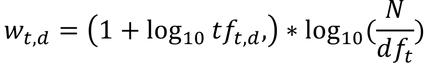

### **Term Keseluruhan**
Menggabungkan term pada keseluruhan dokumen.

In [ ]:
def join_array_to_string(arr):
  return ' '.join(arr)

term = df.applymap(join_array_to_string)
term

,0,1,2,3,4,5,6,7,8,9,...,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658
title-publisher,identifi slum area spread base multi tempor im...,mechan properti untreat alkalin treat fiber za...,silico analysi reveal potenti myricetin red ri...,implement delay disrupt toler network approach...,geospati model physic social vulner tsunami ri...,use mercuri resist bacteria enhanc phytoremedi...,factor affect servic qualiti repurchas intent ...,surfac modif polystyren coat qcm sensor use am...,effect hydro oceanograph factor commun structu...,design construct singl arm crane miniatur stev...,...,character chemic physic mechan properti naoh t...,measur qualiti servic qo sever forward strateg...,vitro nutrient degrad complet feed contain myr...,silico studi marselia crenata compound activ k...,develop algorithm hp tld barc dose evalu use r...,flame stabil gaseou fuel combust insid meso sc...,engag emot classif facial landmark use convolu...,oper ballast water commerci vessel port tanjun...,structur composit major arbuscular mycorrhiza ...,dri kinet porang amorphophallu mueller b chip ...


In [ ]:
term_list = []
for col in term.columns:
  term_list.append(term[col][0])
term_list

['identifi slum area spread base multi tempor imageri data sustain futur human secur societi citi govern',
 'mechan properti untreat alkalin treat fiber zalacca midrib wast aip confer proceed',
 'silico analysi reveal potenti myricetin red rice bran east java inhibitor advanc glycat end product age receptor rage signal pathway aip confer proceed',
 'implement delay disrupt toler network approach e learn case studi belajardisini.com proceed intern confer sustain inform engin technolog',
 'geospati model physic social vulner tsunami risk analysi intern journal geomat',
 'use mercuri resist bacteria enhanc phytoremedi soil contamin small scale gold mine tail natur environ pollut technolog',
 'factor affect servic qualiti repurchas intent intern journal civil engin technolog',
 'surfac modif polystyren coat qcm sensor use ambient air plasma low pressur materi today proceed',
 'effect hydro oceanograph factor commun structur plankton natur artifici coral reef paiton water aacl bioflux',
 'd

### **Hapus Term yang Paling Sering Muncul**
Term yang sering muncul dihapus untuk mendapatkan hasil yang lebih baik.

In [ ]:
def remove_specific_words(sentence, words_to_remove):
    # Buat pola regex untuk mencocokkan kata yang ingin dihapus
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b', flags=re.IGNORECASE)

    # Hapus kata-kata yang cocok dengan pola dari kalimat
    result = re.sub(pattern, '', sentence)
    return result

# Daftar kata-kata yang ingin dihapus
words_to_remove = [' journal', ' confer', ' scienc', ' intern', ' seri', ' iop', ' effect', ' use', ' indonesia', ' engin']

# Daftar string setelah penghapusan
term_list = [remove_specific_words(sentence, words_to_remove) for sentence in term_list]
term_list

['identifi slum area spread base multi tempor imageri data sustain futur human secur societi citi govern',
 'mechan properti untreat alkalin treat fiber zalacca midrib wast aip proceed',
 'silico analysi reveal potenti myricetin red rice bran east java inhibitor advanc glycat end product age receptor rage signal pathway aip proceed',
 'implement delay disrupt toler network approach e learn case studi belajardisini.com proceed sustain inform technolog',
 'geospati model physic social vulner tsunami risk analysi geomat',
 'use mercuri resist bacteria enhanc phytoremedi soil contamin small scale gold mine tail natur environ pollut technolog',
 'factor affect servic qualiti repurchas intent civil technolog',
 'surfac modif polystyren coat qcm sensor ambient air plasma low pressur materi today proceed',
 'effect hydro oceanograph factor commun structur plankton natur artifici coral reef paiton water aacl bioflux',
 'design construct singl arm crane miniatur stevedor th electr machin system 

### **Cari Kata Kunci**
Pisahkan term keseluruhan.

In [ ]:
import numpy as np

words_set = set()
for term in term_list:
    words = term.split(' ')
    words_set = words_set.union(set(words))

print('Jumlah kata keseluruhan:', len(words_set))
print('Kata keseluruhan: ', words_set)

Jumlah kata keseluruhan: 7383
Kata keseluruhan:  {'semiconduct', 'longicep', 'hepatolog', 'polysaccharid', 'ippi', 'bed', 'ricinu', 'styren', 'uuo', 'rat', 'util', 'cours', 'mife', 'iron', 'autoencod', 'jejun', 'empan', 'k', 'metabarcod', 'contamin', 'premix', 'hermetia', 'terrorist', 'lemuru', 'rfid', 'dimethoxycoumarin', 'univers', 'balanc', 'deal', 'sign', 'mer', 'shape', 'mild', 'blu', 'microfiltr', 'rhlc', 'urban', 'sequestr', 'implant', 'thesi', 'luciferas', 'uterosacr', 'bocek', 'geotherm', 'lung', 'acquir', 'episod', 'bacillu', 'postintens', 'biogeograph', 'schyzophylum', 'oyster', 'kuhl', 'potensi', 'cavit', 'wheel', 'calophyllum', 'rattu', 'demograph', 'degranul', 'batteri', 'stenotrophomona', 'puriti', 'wax', 'illuden', 'percutan', 'chromatograph', 'widen', 'hegemoni', 'berghei', 'particl', 'attribut', 'torbangun', 'tom', 'sh', 'wcse', 'framework', 'nickel', 'uplink', 'solar', 'technic', 'resolv', 'isa', 'ilmiah', 'topsoil', 'hydru', 'wsea', 'aba', 'triglycerid', 'triangular

### **Visualisasi WordCloud**
Melakukan visualisasi untuk term yang sering muncul.

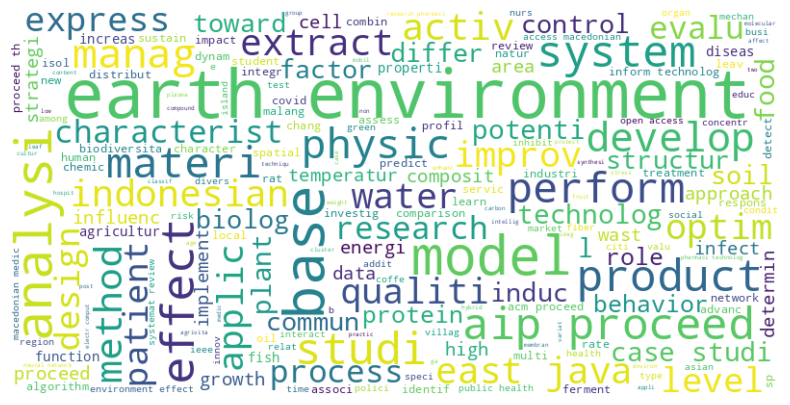

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dari kolom DataFrame menjadi satu string
all_text = ' '.join(term_list)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Hitung TF**

In [ ]:
n_docs = len(term_list)
n_words_set = len(words_set)

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))
for i in range(n_docs):
    words = term_list[i].split(' ')
    for w in words:
        df_tf[w][i] = df_tf[w][i] + 1
        df_tf[w][i] = 1 + np.log10(df_tf[w][i])

df_tf_t = df_tf.T
df_tf_t.columns = ["D" + str(i) for i in range(1, n_docs + 1)]
df_tf_t

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D2650,D2651,D2652,D2653,D2654,D2655,D2656,D2657,D2658,D2659
semiconduct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
longicep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hepatolog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
polysaccharid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ippi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vanillin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sammaniyah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
root,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
label,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tf_t.values
tf_array = np.transpose(df_tf_t.values)
tf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **Hitung IDF**

In [ ]:
idf = {}

for w in words_set:
    k = 0

    for i in range(n_docs):
        if w in term_list[i].split():
            k += 1

    if k == 0:
        # jika k sama dengan nol
        idf[w] = 0
        print(w + ": Division by zero, set idf to 0")
    else:
        idf[w] = np.log10(n_docs / k)
        print(w + ":" + str(idf[w]))

Output streaming akan dipotong hingga 5000 baris terakhir.
youth:3.424718337331567
tooth:2.8226583460036045
stainton:3.424718337331567
whale:3.123688341667586
stirrup:3.424718337331567
chamber:3.424718337331567
stomatolog:3.424718337331567
rose:3.424718337331567
futur:2.57962029731731
barn:3.424718337331567
pathogen:2.6465670869479236
freseniu:3.424718337331567
pan:3.424718337331567
epoxi:3.123688341667586
hot:2.424718337331567
around:2.57962029731731
vera:3.424718337331567
clinic:1.844934740714757
storag:2.145964736378738
entreprenueri:3.424718337331567
rosella:3.424718337331567
unipolar:3.424718337331567
mucac:3.424718337331567
pregnant:2.57962029731731
ngule:3.424718337331567
puerulu:3.424718337331567
moieti:2.9475970826119045
insul:2.8226583460036045
surfac:1.893239420289312
troglodytarum:3.424718337331567
rasayan:2.8226583460036045
set:2.7257483329955483
depth:2.9475970826119045
engineeri:3.123688341667586
adsorpt:2.7257483329955483
give:3.123688341667586
access:1.833653730305068


### **Hitung TF-IDF**

In [ ]:
df_tf_idf = np.zeros((n_words_set, n_docs))

for j, w in enumerate(words_set):
    df_tf_idf[j, :] = df_tf[w].values * idf[w]

df_tf_idf = pd.DataFrame(df_tf_idf, index=list(words_set), columns=["D" + str(i) for i in range(1, n_docs + 1)])
df_tf_idf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D2650,D2651,D2652,D2653,D2654,D2655,D2656,D2657,D2658,D2659
semiconduct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
longicep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hepatolog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
polysaccharid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ippi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vanillin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sammaniyah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
root,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
label,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_array = df_tf_idf.values
tf_idf_array = np.transpose(tf_idf_array)
tf_idf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **Modelling (Clustering)**

### **Fungsi FCM**
Fuzzy C-Means (FCM) adalah algoritma clustering yang memanfaatkan konsep fuzzy untuk menentukan tingkat keanggotaan setiap data terhadap klaster. Berbeda dengan pendekatan klaster konvensional yang menetapkan data secara tegas ke satu klaster, FCM mengizinkan setiap data memiliki tingkat keanggotaan yang berkisar dari 0 hingga 1 terhadap masing-masing klaster. Proses iteratif FCM melibatkan perhitungan pusat klaster dan tingkat keanggotaan data secara bergantian, dengan tujuan untuk meminimalkan suatu fungsi objektif.

In [ ]:
def fcm_text(documents, n_clusters, max_iter, fuzzifier, threshold):

    # Inisialisasi matriks derajat keanggotaan
    U = np.random.rand(documents.shape[0], n_clusters)
    U = U / np.sum(U, axis=1)[:, np.newaxis]

    # Inisialisasi centroid
    V = np.zeros((n_clusters, documents.shape[1]))

    # Inisialisasi membership_matrix_old
    V_old = V.copy()

    # Main loop
    for iter in range(max_iter):
        # Update centroid
        for c in range(n_clusters):
            V[c, :] = np.sum((U[:, c] ** fuzzifier)[:, np.newaxis] * documents, axis=0) / np.sum(U[:, c] ** fuzzifier)

        # Hitung jarak
        distances = []
        for i in range (documents.shape[0]):
            distances.append(np.sqrt(np.sum((documents[i, :] - V) ** 2, axis=1)))
        distances = np.array(distances)

        # Update derajat keanggotaan
        for jumlahdata in range(documents.shape[0]):
            for i in range(n_clusters):
                sum = 0
                for j in range(n_clusters):
                    sum += ((distances[jumlahdata][i] / distances[jumlahdata][j]) ** 2)
                U[jumlahdata,i] = 1/sum

        # Cek konvergensi
        if np.linalg.norm(V - V_old) < threshold:
            break

        V_old = V.copy()

    return U, V

### **Tuning Hyperparameter**

In [ ]:
max_iter = 10
fuzzifier = 2
threshold = 0.01

### **Fungsi Cosine Similarity, Euclidean, dan Silhoutte**

In [ ]:
def cosine_similarity(X):
    similarity_matrix = np.dot(X, X.T)
    norm_matrix = np.linalg.norm(X, axis=1, keepdims=True)
    norm_matrix = np.dot(norm_matrix, norm_matrix.T)
    similarity_matrix = similarity_matrix / norm_matrix
    return similarity_matrix

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def silhouette_score(X, labels):
    distance_matrix = np.zeros((len(X), len(X)))

    for i in range(len(X)):
        for j in range(len(X)):
            distance_matrix[i, j] = euclidean_distance(X[i], X[j])

    silhouette_scores = []

    for i in range(len(X)):
        a_i = np.mean(distance_matrix[i, labels == labels[i]])

        b_i_min = float('inf')
        for j in set(labels):
            if j != labels[i]:
                b_i = np.mean(distance_matrix[i, labels == j])
                b_i_min = min(b_i_min, b_i)

        b_i = b_i_min
        silhouette_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(silhouette_i)

    return np.mean(silhouette_scores)

### **Best Cluster**

Cluster:  2
Silhouette Score:  0.009827851705157006
Cluster:  3
Silhouette Score:  0.00695102537713036
Cluster:  4
Silhouette Score:  0.0015253909498962224
Cluster:  5
Silhouette Score:  0.0010406963183179835
Cluster:  6
Silhouette Score:  0.0032509171991134643
Cluster:  7
Silhouette Score:  0.005078606316557979
Cluster:  8
Silhouette Score:  0.00042252217968052343
Cluster:  9
Silhouette Score:  0.0033954494179974687


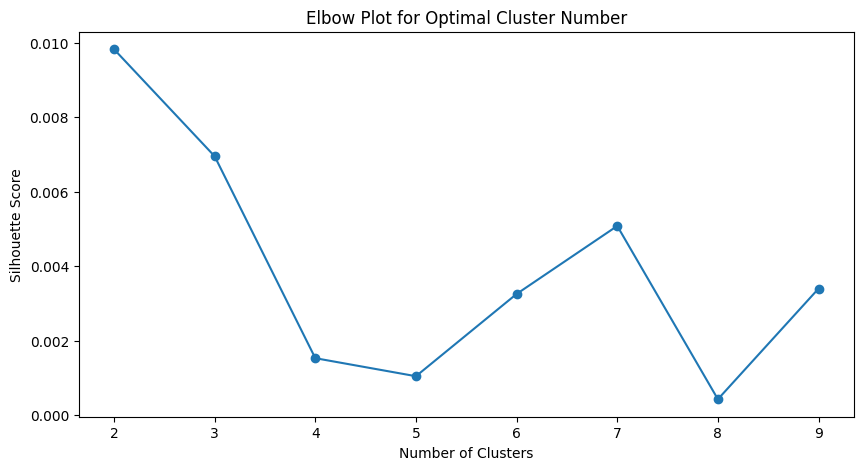


Best Cluster:  2


In [ ]:
best_clusters = 0
previous_silhouette = 0.0
silhouette_scores = []
for n_clusters in range(2, 10):
    U, V = fcm_text(tf_idf_array, n_clusters, max_iter, fuzzifier, threshold)

    X_iter = cosine_similarity(tf_idf_array)

    silhouette_sc = silhouette_score(X_iter, labels=np.argmax(U, axis=1))
    silhouette_scores.append(silhouette_sc)

    if silhouette_sc > previous_silhouette:
        previous_silhouette = silhouette_sc
        best_clusters = n_clusters
    print("Cluster: ", n_clusters)
    print("Silhouette Score: ", silhouette_sc)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Elbow Plot for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Pilih jumlah klaster terbaik berdasarkan Elbow Plot
best_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("\nBest Cluster: ", best_clusters)

### **Hasil Clustering**

In [ ]:
best_n_clusters = best_clusters

cluster_labels = np.argmax(U, axis=1)

for cluster_num in range(best_n_clusters):
    print(f"\nDokumen dalam Cluster {cluster_num + 1}:")
    cluster_indices = np.where(cluster_labels == cluster_num)[0]

    for doc_index in cluster_indices:
        print(f"Dokumen {doc_index + 1}")
        print(doc[doc_index].values[0])


Dokumen dalam Cluster 1:
Dokumen 26
The Effect of a Majority Group’s Perspective-Taking on Minority Helping Psychological Studies
Dokumen 46
Estimation of Nonparametric Path Fourier Series and Truncated Spline Ensemble Models Mathematics and Statistics
Dokumen 62
Disposable TSM-biosensor based on viscosity changes of the contacting medium Biosensors and Bioelectronics
Dokumen 78
Inhibitory effect of genistein on MMP-2 and MMP-9 expression through suppressing NF-?B activity in peritoneum of murine model of endometriosis Asian Pacific Journal of Reproduction
Dokumen 79
Vitamin D prevents endothelial damage induced by increased neutrophil extracellular traps formation in patients with systemic lupus erythematosus Acta medica Indonesiana
Dokumen 128
Performance improvement of dye-sensitized solar cell- (DSSC-) based natural dyes by clathrin protein International Journal of Photoenergy
Dokumen 140
The effect of (E)-1-(4'-aminophenyl)-3-phenylprop-2-en-1-one on MicroRNA-18a, Dicer1, and MMP

### **Top Term Per Cluster**

In [ ]:
def top_terms_per_cluster(U, V, words_set, num_top_terms=10):
    top_terms_per_cluster = {}

    for cluster_num in range(best_clusters):
        # Mendapatkan derajat keanggotaan untuk setiap term di cluster ini
        membership_degrees = U[:, cluster_num]

        # Menampilkan term dengan bobot tertinggi di cluster ini
        top_terms_indices = membership_degrees.argsort()[-num_top_terms:][::-1]

        # Ambil kata-kata dari indeks tersebut
        top_terms = [list(words_set)[i] for i in top_terms_indices]

        top_terms_per_cluster[cluster_num + 1] = top_terms

    return top_terms_per_cluster

# Menggunakan fungsi top_terms_per_cluster untuk mendapatkan top term per cluster
top_terms_per_cluster = top_terms_per_cluster(U, V, words_set)

# Menampilkan hasil top term per cluster
for cluster_num, top_terms in top_terms_per_cluster.items():
    print(f"\nTop term di Cluster {cluster_num}: {', '.join(top_terms)}")


Top term di Cluster 1: knot, atangana, slug, infer, subsoci, esp, laminaran, ner, aquacultur, incid

Top term di Cluster 2: composit, uniqu, moral, gigantochloa, coars, endogen, moran, fashion, wmt, ignit


## **Membandingkan dengan Algoritma Lain (Library)**
Membandingkan untuk lebih mengetahui kinerja model

### **TF-IDF**
Menghitung TF-IDF menggunakan library scikit-learn.

Sumber: https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

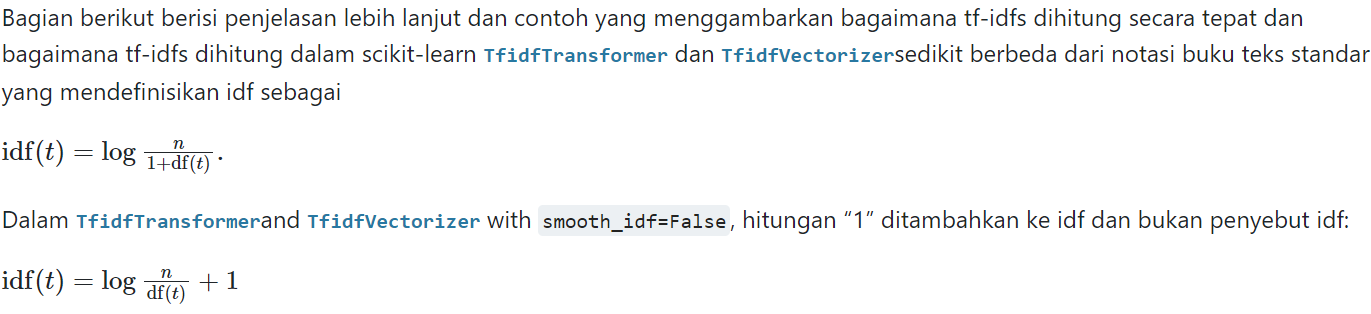

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(documents):
    vectorizer = TfidfVectorizer()
    vectorized_docs = vectorizer.fit_transform(documents)
    return vectorized_docs

data_tfidf = tfidf_vectorize(data['title-publisher'])
data_tfidf_np = data_tfidf.toarray()
data_tfidf_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **KMeans**
KMeans merupakan algoritma clustering yang berfokus pada pengelompokan data ke dalam klaster dengan menggunakan jarak Euclidean. Langkah-langkah utama KMeans melibatkan inisialisasi pusat klaster, penugasan setiap data ke klaster dengan pusat terdekat, dan perhitungan pusat klaster baru. Algoritma ini berusaha untuk mengurangi variasi dalam klaster dengan mengoptimalkan penempatan pusat klaster. KMeans efektif ketika klaster bersifat terpisah dan tidak tumpang tindih.


Cluster: 2
Silhouette Score: 0.005315532055384642
Cluster: 3
Silhouette Score: 0.0066347212218346415
Cluster: 4
Silhouette Score: 0.0075177351996284425
Cluster: 5
Silhouette Score: 0.007753206464987859
Cluster: 6
Silhouette Score: 0.0077323206142218
Cluster: 7
Silhouette Score: 0.007927529156910619
Cluster: 8
Silhouette Score: 0.006982273430881144
Cluster: 9
Silhouette Score: 0.008230859897848159


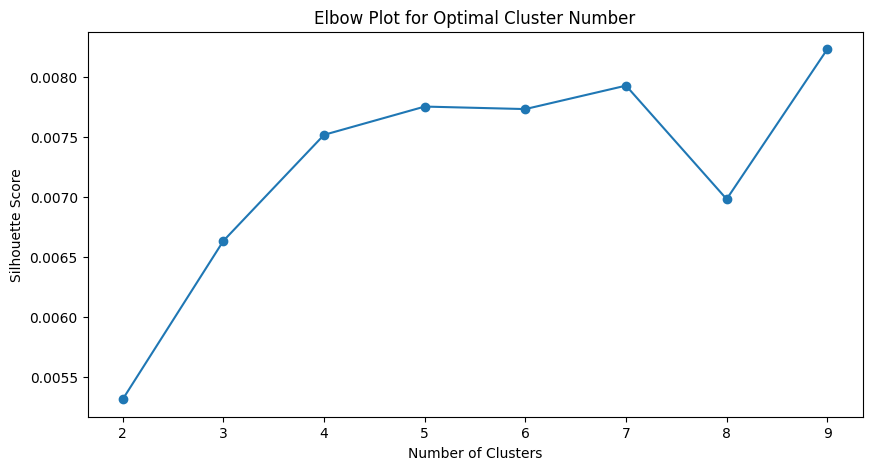


Best Cluster: 9


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Kumpulan nilai Silhouette Score
silhouette_scores = []

# Mencoba jumlah klaster dari 2 hingga 10
for n_clusters in range(2, 10):
    # Inisialisasi model K-Means dengan menyetel n_init secara eksplisit
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

    # Melakukan clustering
    cluster_labels = kmeans.fit_predict(data_tfidf)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(data_tfidf, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print("Cluster:", n_clusters)
    print("Silhouette Score:", silhouette_avg)

# Visualisasi Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Elbow Plot for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Pilih jumlah klaster terbaik berdasarkan Elbow Plot
best_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("\nBest Cluster:", best_clusters)

## **Conclusion**
Secara keseluruhan, model Fuzzy C-Means (FCM) yang diimplementasikan dari awal (scratch) telah menunjukkan kinerja yang lebih baik dibandingkan dengan model KMeans dari pustaka scikit-learn, seperti yang diindikasikan oleh nilai silhoutte score. Nilai silhoutte score, yang merupakan ukuran seberapa baik cluster terpisah, secara konsisten lebih tinggi untuk model FCM scratch pada berbagai jumlah cluster.